In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
from mt.paper_plots import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
root_path = Path('/home/kuntik/dev/datasets/dental_data')
ds_path = root_path / 'caries6.json'
test_ds_path = root_path / 'test_annotations_ordered.json'
best_ensemble_path = root_path / 'filtered_ens_all.json'

In [9]:
# I am not sure about the style 
from mt.utils.visualization import set_matplotlib
plt.style.use('seaborn-white')
set_matplotlib()

/tmp/ipykernel_37339/976631891.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


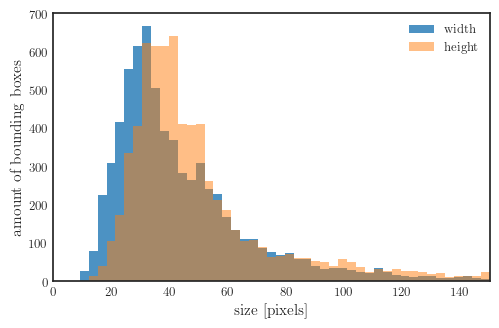

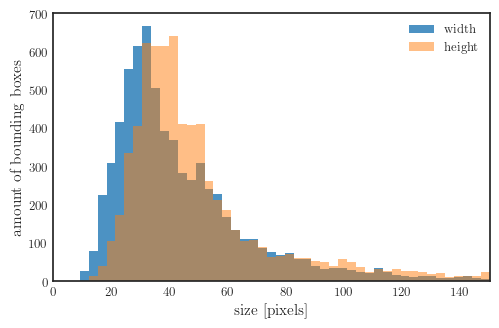

In [10]:
bboxes_width_height_histogram(ds_path)

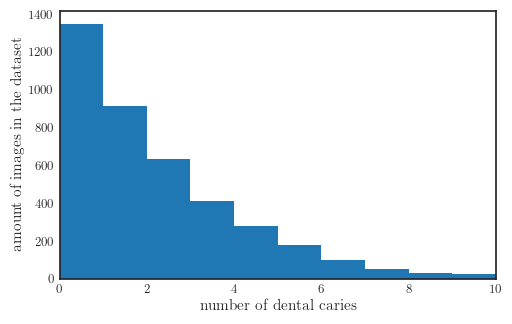

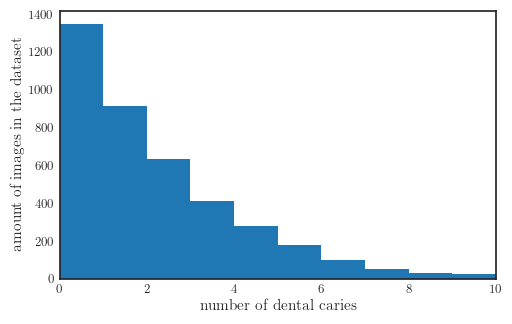

In [11]:
num_caries_histogram(ds_path)

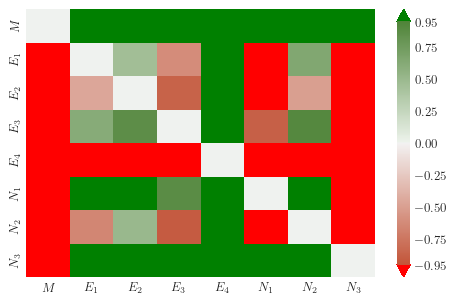

In [40]:
from mt.evaluation.comparison.gold_standard import generate_gold_standard_data, generate_gold_wilcoxon_signed_pvals
import json

with open(best_ensemble_path, 'r') as f:
    ens = json.load(f)

with open(test_ds_path, 'r') as f:
    test_ds = json.load(f)

ids = [0,1,2,3,4,5,6,7,8]
_, ious, errors = generate_gold_standard_data(test_ds, ens, ids, per_img=True)
ious_pvals, errors_pvals = generate_gold_wilcoxon_signed_pvals(ious, errors)

names = ["$M$", "$E_1$", "$E_2$", "$E_3$", "$E_4$", "$N_1$", "$N_2$", "$N_3$"]
fig = create_heatmap_from_pvalues(ious_pvals, names)
fig.savefig('heatmap_ious_golden.pdf', format='pdf', bbox_inches='tight')

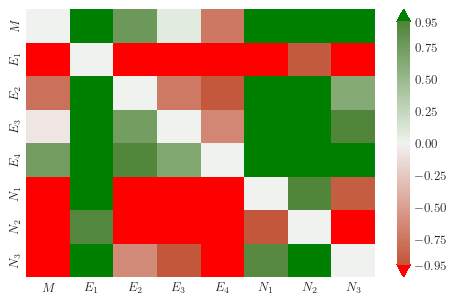

In [41]:
fig = create_heatmap_from_pvalues(errors_pvals, names)
fig.savefig('heatmap_errors_golden.pdf', format='pdf', bbox_inches='tight')


In [34]:
from mt.evaluation.comparison.pairwise_comparison import pairwise_signed_pvalues

signed_iou_pvals, signed_error_pvals = pairwise_signed_pvalues(test_ds_path, best_ensemble_path)
names = ["$M$", "$E_1$", "$E_2$", "$E_3$", "$E_4$", "$N_1$", "$N_2$", "$N_3$"]

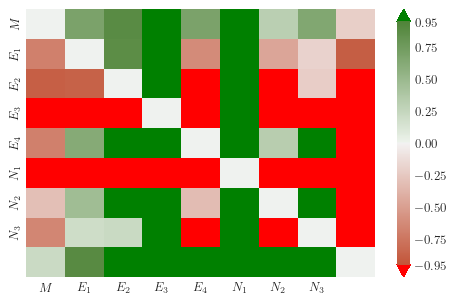

In [42]:
fig = create_heatmap_from_pvalues(signed_iou_pvals, names)
fig.savefig('heatmap_ious.pdf', format='pdf', bbox_inches='tight')



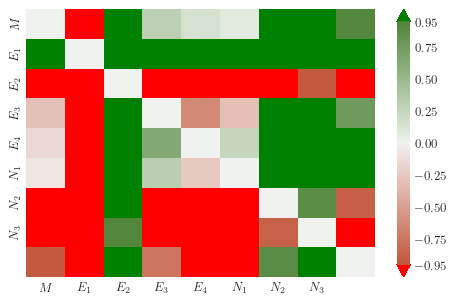

In [43]:
fig = create_heatmap_from_pvalues(signed_error_pvals, names)
fig.savefig('heatmap_errors.pdf', format='pdf', bbox_inches='tight')



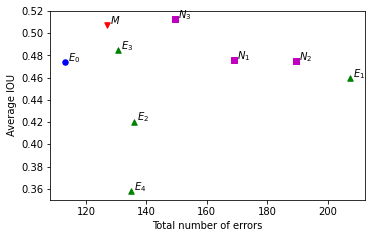

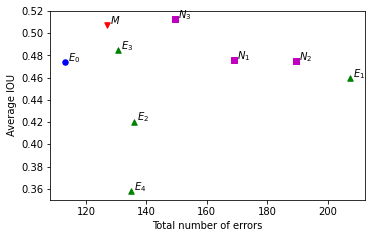

In [20]:
from mt.paper_plots import pairwise_averaged_plot, pairwise_plot

pairwise_averaged_plot(str(test_ds_path), best_ensemble_path, average_over="experts")

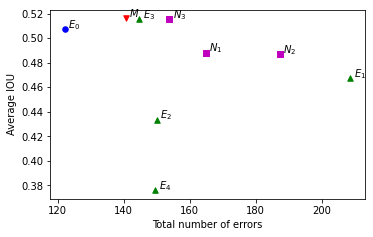

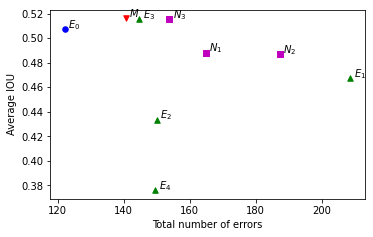

In [19]:
pairwise_averaged_plot(str(test_ds_path), best_ensemble_path, average_over="all")

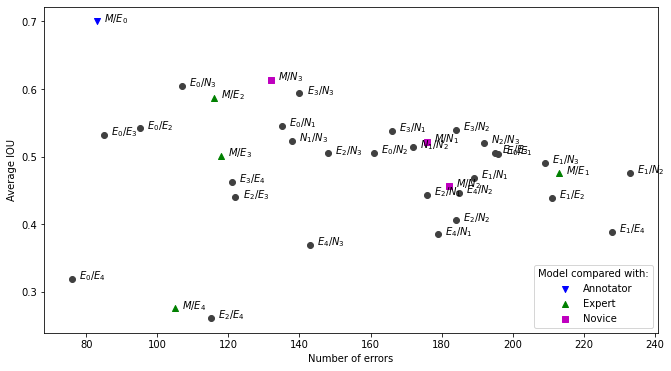

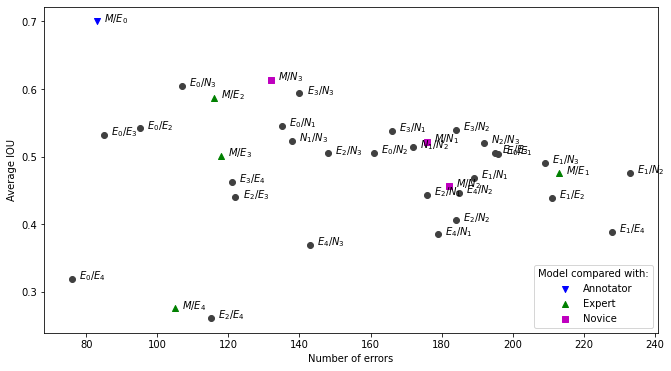

In [22]:
pairwise_plot(str(test_ds_path), best_ensemble_path)

In [5]:
from mt.paper_plots import pr_curve

In [22]:

names = ['YOLOv5-S', 'YOLOv5-M', 'YOLOv5-L', 'RetinaNet-R50', 'RetinaNet-R101', 'RetinaNet-SwinT', 'FasterRCNN-R50', 'FasterRCNN-R101', 'EfficientDet-D0', 'EfficientDet-D1', 'EfficientDet-D4']
data_root = Path('../dental_data/preds')
data_path = [ 'yolov5/small/0.773.json',  'yolov5/medium/0.808.json',  'yolov5/large/0.815.json',  'retinanet/resnet50/0.814.json',
               'retinanet/resnet101/0.789.json',  'retinanet/swint/0.827.json',  'faster_rcnn/resnet50/0.801.json',  'faster_rcnn/resnet101/0.791.json',
                'd0/0.762.json', 'd1/0.792.json', 'd4/0.742.json'
            ]
# data_path [(data_root / p) for p in data_path]
full_data_path = [data_root / p for p in data_path]
pr_curve(ds_path, names, full_data_path)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.68s)
creating index...
index created!
Running per image evaluation...
DONE (t=18.66s).
Accumulating evaluation results...
DONE (t=3.20s).
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
DONE (t=13.33s).
Accumulating evaluation results...
DONE (t=2.57s).
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.28s)
creating index...
index created!
Running per image evaluation...
DONE (t=10.21s).
Accumulating evaluation results...
DONE (t=1.71s).
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.27s)
creating index...
index created!
Running per image evaluation...
DONE (t=8.27